Data loading and preprocessing


*   Importing the needed libraries
*   Load the data
*  Check the shape of the data
*   Correct the Data Format
*   Drop useless columns
*   Check the missing values and replace by the Mode



In [1]:
# Step 0 Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Load the data
data = pd.read_csv('PATH/TO/THE/DATAFILE')

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
# Data shape & Type
data.shape

(1000, 39)

In [10]:
# Data cleaning
data = data.replace('?', np.nan)

# Drop unnecessary columns
dropable_columns = ['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip', 'incident_location',
                    'incident_date', 'incident_state', 'incident_city', 'auto_make', 'auto_model', 'auto_year']
data.drop(dropable_columns, axis=1, inplace=True)
data.shape

(1000, 28)

In [11]:
# Fill null values with mode
print("Number of Null values:\n", data.isnull().sum())

Number of Null values:
 months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                 

In [12]:
data_mode = dict(data.mode().iloc[0])
data = data.fillna(data_mode)
print("Number of Null values:\n", data.isnull().sum())

Number of Null values:
 months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64


In [15]:
# Check the data types and use Label Encoding to convert categorical values to numerical
data.dtypes

,0
months_as_customer,int64
age,int64
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_sex,object
insured_education_level,object
insured_occupation,object
insured_hobbies,object


In [16]:
# Iterate through the data types and perform label encoding for columns with object data type
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Display the first few rows of the encoded DataFrame
print(data.head())

   months_as_customer  age  policy_csl  policy_deductable  \
0                 328   48           1               1000   
1                 228   42           1               2000   
2                 134   29           0               2000   
3                 256   41           1               2000   
4                 228   44           2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3 

Feature correlation visualization

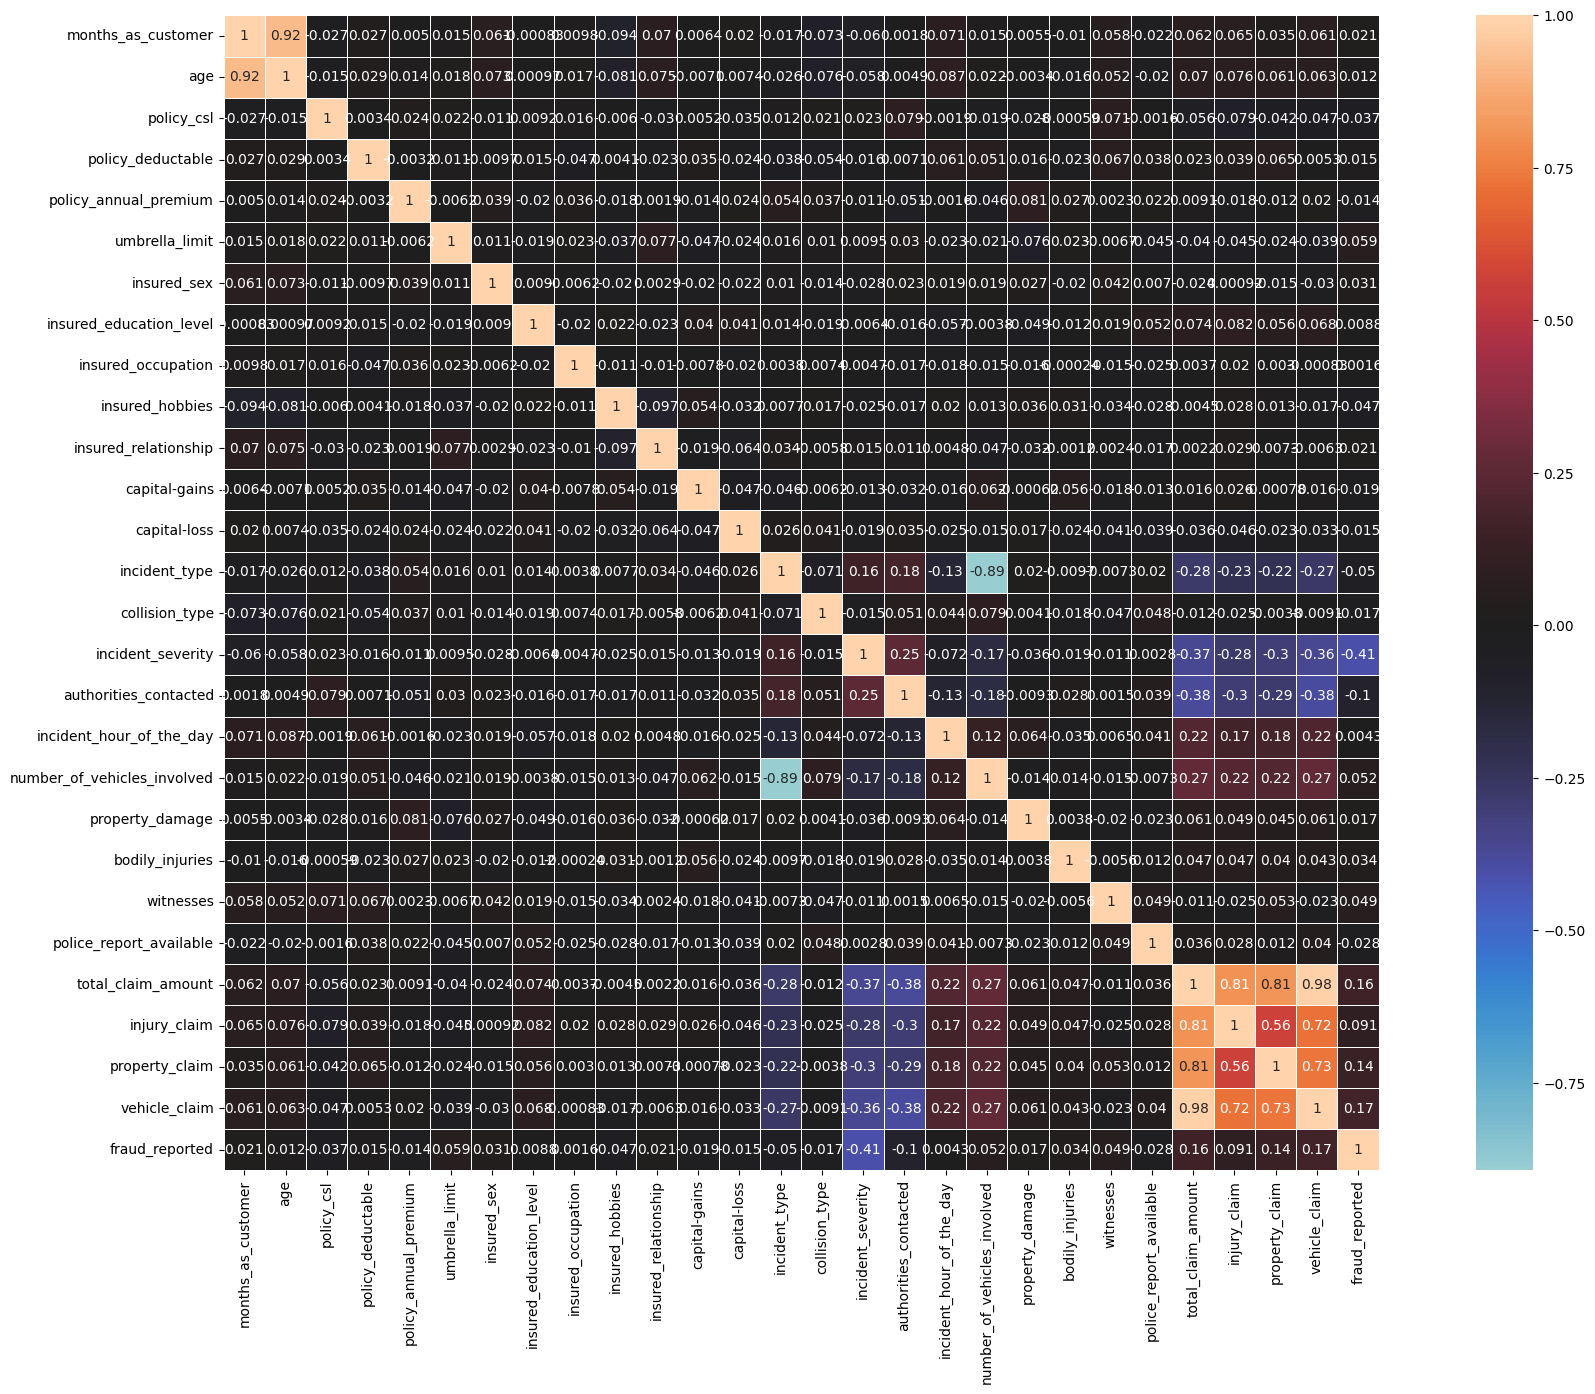

In [18]:
# Feature correlations
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), linewidths=0.5, square=True, center=0, annot=True)
plt.show()

**1 = Y = Fraud**

**0 = N = Not fraud**

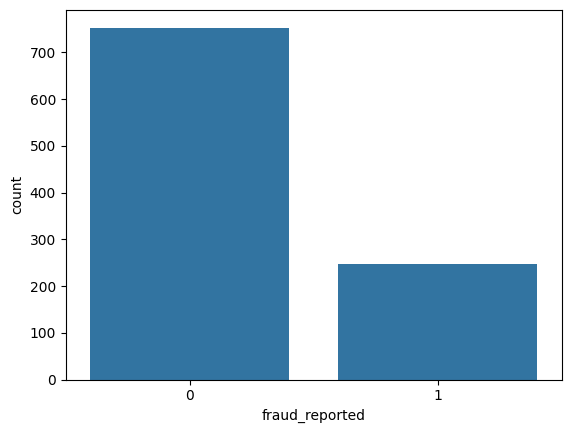

In [20]:
# Check class distribution
sns.countplot(x='fraud_reported', data=data)
plt.show()

In [21]:
final_df = data.copy()

# Prepare features and target
target_value = 'fraud_reported'
X = final_df.drop([target_value], axis=1)
y = final_df[target_value]

# Split data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
pred_y = clf.fit(train_X, train_y).predict(test_X)

In [23]:
# Evaluate the model
print("Accuracy:", accuracy_score(test_y, pred_y))
print("Confusion Matrix:")
print(confusion_matrix(test_y, pred_y))
print("ROC AUC Score:", roc_auc_score(test_y, pred_y))

Accuracy: 0.7433333333333333
Confusion Matrix:
[[196  24]
 [ 53  27]]
ROC AUC Score: 0.6142045454545454


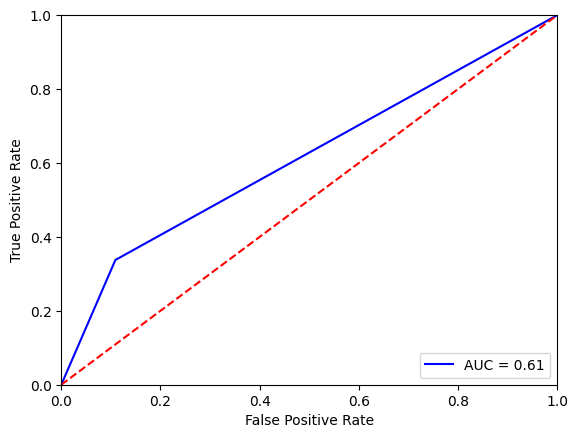

In [24]:
# Plot ROC curve
fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()